<a href="https://colab.research.google.com/github/TaliOrsi/Portif-lio-Dados/blob/main/Intelig%C3%AAncia%20Artificial%20para%20Predizer%20Medalhas%20Ol%C3%ADmpicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Etapa 1 - Vamos analisar 120 anos de dados históricos dos Jogos Olímpicos, começando nos jogos de Atenas indo até o Rio de Janeiro em 2016, utilizando Ciência de Dados.

Etapa 2 - Coleta de dados 
https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=noc_regions.csv


Etapa 3 - Análise, interpretação e visualização dos Dados
*importando as bibliotecas

In [185]:
#manipulação de dados
import pandas as pd

#visualização
import missingno 
import seaborn as sns
import matplotlib.pyplot as plt


#machine learning
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_atleta = pd.read_csv("athlete_events.csv")

In [3]:
df_atleta.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df_atleta.tail(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [5]:
df_atleta.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [6]:
df_atleta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


Dicionário de dados

ID - Número único para cada atleta
Nome - nome do atleta
Sexo - M ou F
Idade - Inteiro
Altura - em centímetros
Peso - em quilogramas
Equipe - nome da equipe
NOC - Código de 3 letras do Comitê Olímpico Nacional
Jogos - ano e temporada
Ano - Inteiro
Temporada - verão ou inverno
Cidade - Cidade -sede
Esporte - Esporte
Evento - Evento
Medalha - Ouro, Prata, Bronze ou NA

In [7]:
df_atleta.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [8]:
df_atleta.rename(columns= {"ID": "id_atleta" , "Name": "nome_atleta" , "Sex" : "sexo_atleta", "Age": "idade" , "Height":"altura_atleta" , "Weight" : "peso_atleta", 
                           "Team": "equipe", "NOC": "noc" , "Games": "ano_temporada", "Year": "ano" , 
                           "Season": "temporada" , "City": "cidade_sede" , "Sport": "modalidade_esportiva" , "Event" : "evento",
                           "Medal": "medalha"}, inplace=True)

Temporada


In [9]:
df_atleta.head()

,id_atleta,nome_atleta,sexo_atleta,idade,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Temporada


In [10]:
df_atleta["temporada"].nunique()

2

In [11]:
df_atleta["temporada"].unique()

array(['Summer', 'Winter'], dtype=object)

In [12]:
df_atleta = df_atleta[df_atleta["temporada"] == "Summer"]

In [13]:
df_atleta["temporada"].unique()

array(['Summer'], dtype=object)

###Informações Estatísticas

In [14]:
df_atleta.describe().round(3)

,id_atleta,idade,altura_atleta,peso_atleta,ano
count,222552.000,213363.000,170695.000,168698.000,222552.000
mean,67998.926,25.674,175.516,70.689,1976.317
std,39139.038,6.700,10.915,14.804,30.943
min,1.000,10.000,127.000,25.000,1896.000
25%,34000.750,21.000,168.000,60.000,1956.000
50%,68302.500,24.000,175.000,70.000,1984.000
75%,101881.000,28.000,183.000,79.000,2000.000
max,135568.000,97.000,226.000,214.000,2016.000


###Dados Faltantes

In [15]:
df_atleta.isnull().sum()

id_atleta                    0
nome_atleta                  0
sexo_atleta                  0
idade                     9189
altura_atleta            51857
peso_atleta              53854
equipe                       0
noc                          0
ano_temporada                0
ano                          0
temporada                    0
cidade_sede                  0
modalidade_esportiva         0
evento                       0
medalha                 188464
dtype: int64

In [16]:
df_atleta.isnull().sum().sort_values(ascending=False)

medalha                 188464
peso_atleta              53854
altura_atleta            51857
idade                     9189
evento                       0
modalidade_esportiva         0
cidade_sede                  0
temporada                    0
ano                          0
ano_temporada                0
noc                          0
equipe                       0
sexo_atleta                  0
nome_atleta                  0
id_atleta                    0
dtype: int64

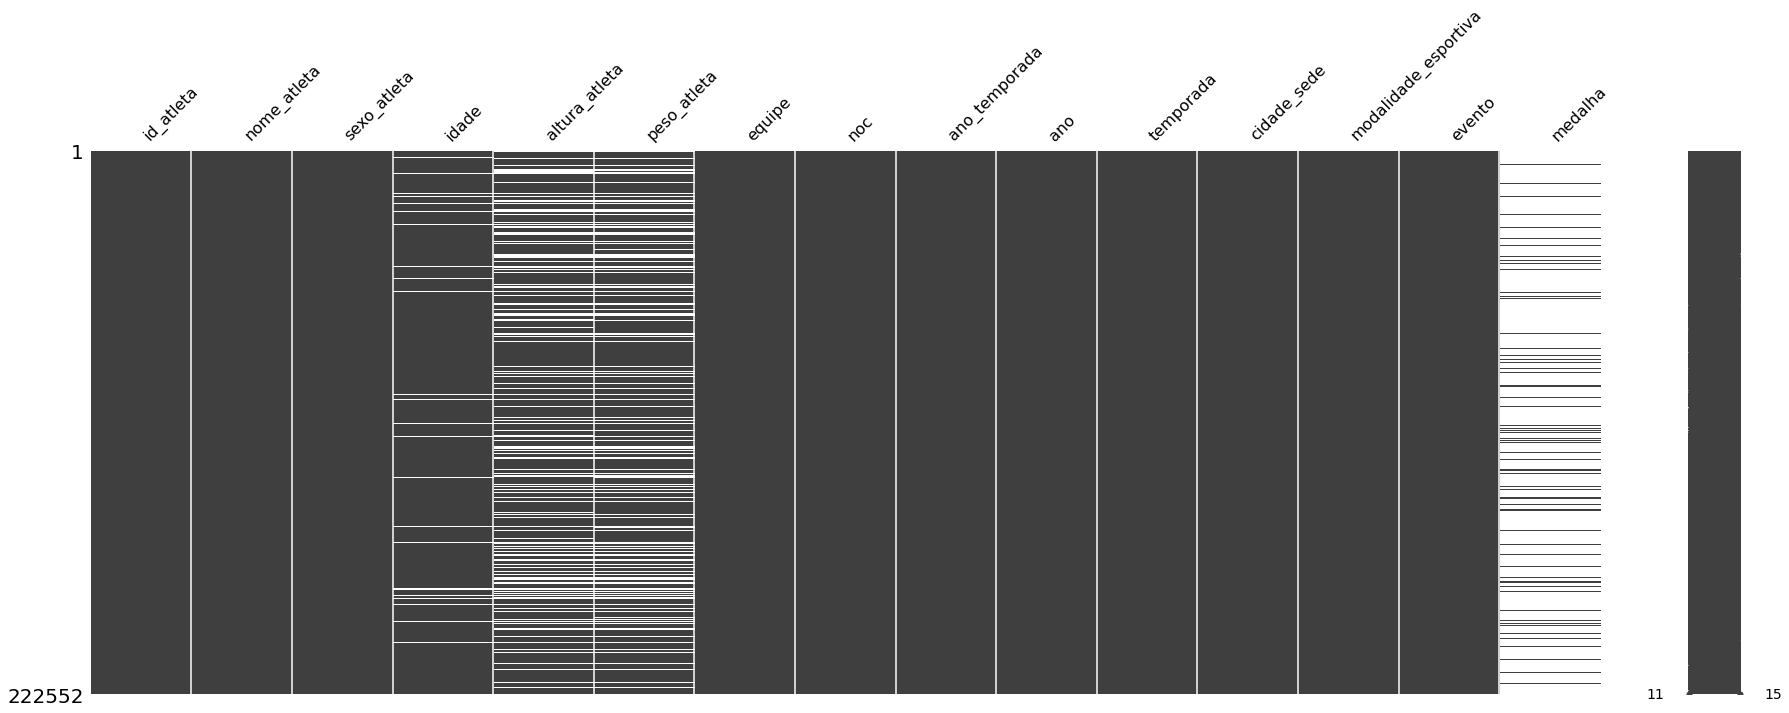

In [17]:
missingno.matrix(df_atleta, figsize = (30,10))

###Duplicatas

In [18]:
df_atleta[df_atleta.duplicated()]

,id_atleta,nome_atleta,sexo_atleta,idade,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha
1252,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
4282,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4283,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN
4862,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN
4864,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269994,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
269995,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN
269997,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
269999,135073,Doris Clare Zinkeisen (-Johnstone),F,49.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN


In [19]:
df_atleta.shape

(222552, 15)

In [20]:
df_atleta.drop_duplicates(inplace=True)

In [21]:
df_atleta[df_atleta.duplicated()]

,id_atleta,nome_atleta,sexo_atleta,idade,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha


In [22]:
df_atleta.shape

(221167, 15)

###Avaliando as Features(Colunas)

In [23]:
df_atleta.head(2)

,id_atleta,nome_atleta,sexo_atleta,idade,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


id_atleta - Identificação única de cada atleta

In [24]:
df_atleta["nome_atleta"].nunique()

116122

###sexo_atleta

In [25]:
df_atleta["sexo_atleta"].unique()

array(['M', 'F'], dtype=object)

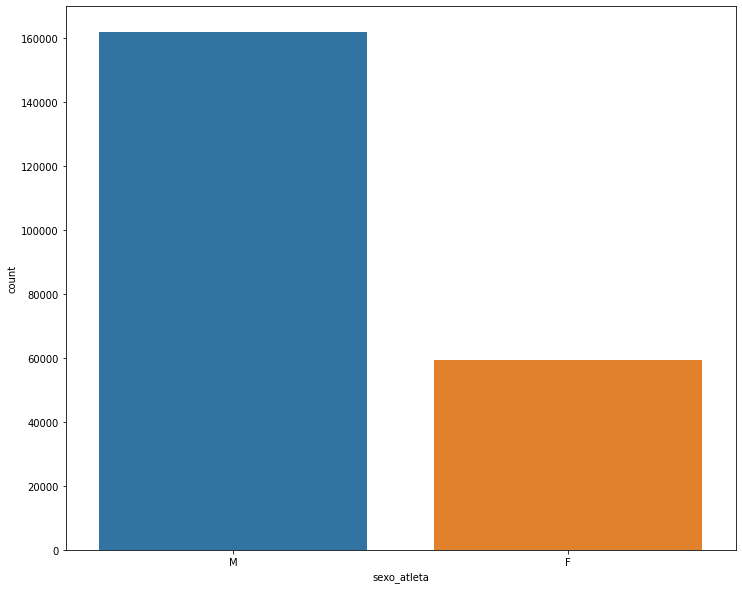

In [26]:
plt.figure(figsize=(12,10))
sns.countplot(x= "sexo_atleta", data= df_atleta)
plt.show()

In [27]:
df_atleta["sexo_atleta"].value_counts()

M    161868
F     59299
Name: sexo_atleta, dtype: int64

###Idade_atleta - Idade do atleta

In [28]:
df_atleta["idade"].nunique()

74

In [29]:
df_atleta.describe()

,id_atleta,idade,altura_atleta,peso_atleta,ano
count,221167.000000,212137.000000,170667.000000,168661.000000,221167.000000
mean,68016.867403,25.549367,175.515560,70.688298,1976.602486
std,39144.711847,6.434035,10.914843,14.805242,30.820855
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34011.500000,21.000000,168.000000,60.000000,1960.000000
50%,68342.000000,24.000000,175.000000,70.000000,1984.000000
75%,101904.500000,28.000000,183.000000,79.000000,2000.000000
max,135568.000000,97.000000,226.000000,214.000000,2016.000000


In [30]:
df_atleta["idade"].min()

10.0

In [31]:
df_atleta["idade"].max()

97.0

In [32]:
df_atleta[df_atleta["idade"] == 97.0]

,id_atleta,nome_atleta,sexo_atleta,idade,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN


In [33]:
df_atleta[df_atleta["idade"] == 96.0]

,id_atleta,nome_atleta,sexo_atleta,idade,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha
98118,49663,Winslow Homer,M,96.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN


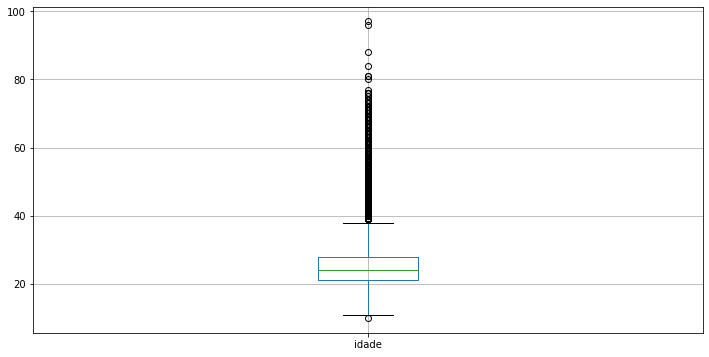

In [34]:
plt.figure(figsize=(12,6))
df_atleta.boxplot("idade")
plt.show()

In [35]:
df_atleta[df_atleta["idade"] == 10.0]

,id_atleta,nome_atleta,sexo_atleta,idade,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha
142882,71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze


In [36]:
df_atleta["idade"] == 10.0

0         False
1         False
2         False
3         False
26        False
          ...  
271106    False
271107    False
271108    False
271109    False
271110    False
Name: idade, Length: 221167, dtype: bool

In [37]:
df_atleta["idade"].describe()

count    212137.000000
mean         25.549367
std           6.434035
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: idade, dtype: float64

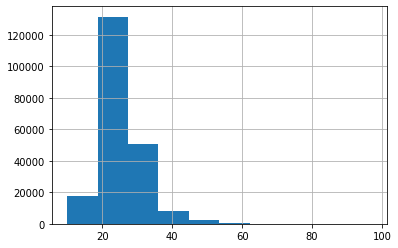

In [38]:
df_atleta["idade"].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribuição Idade')

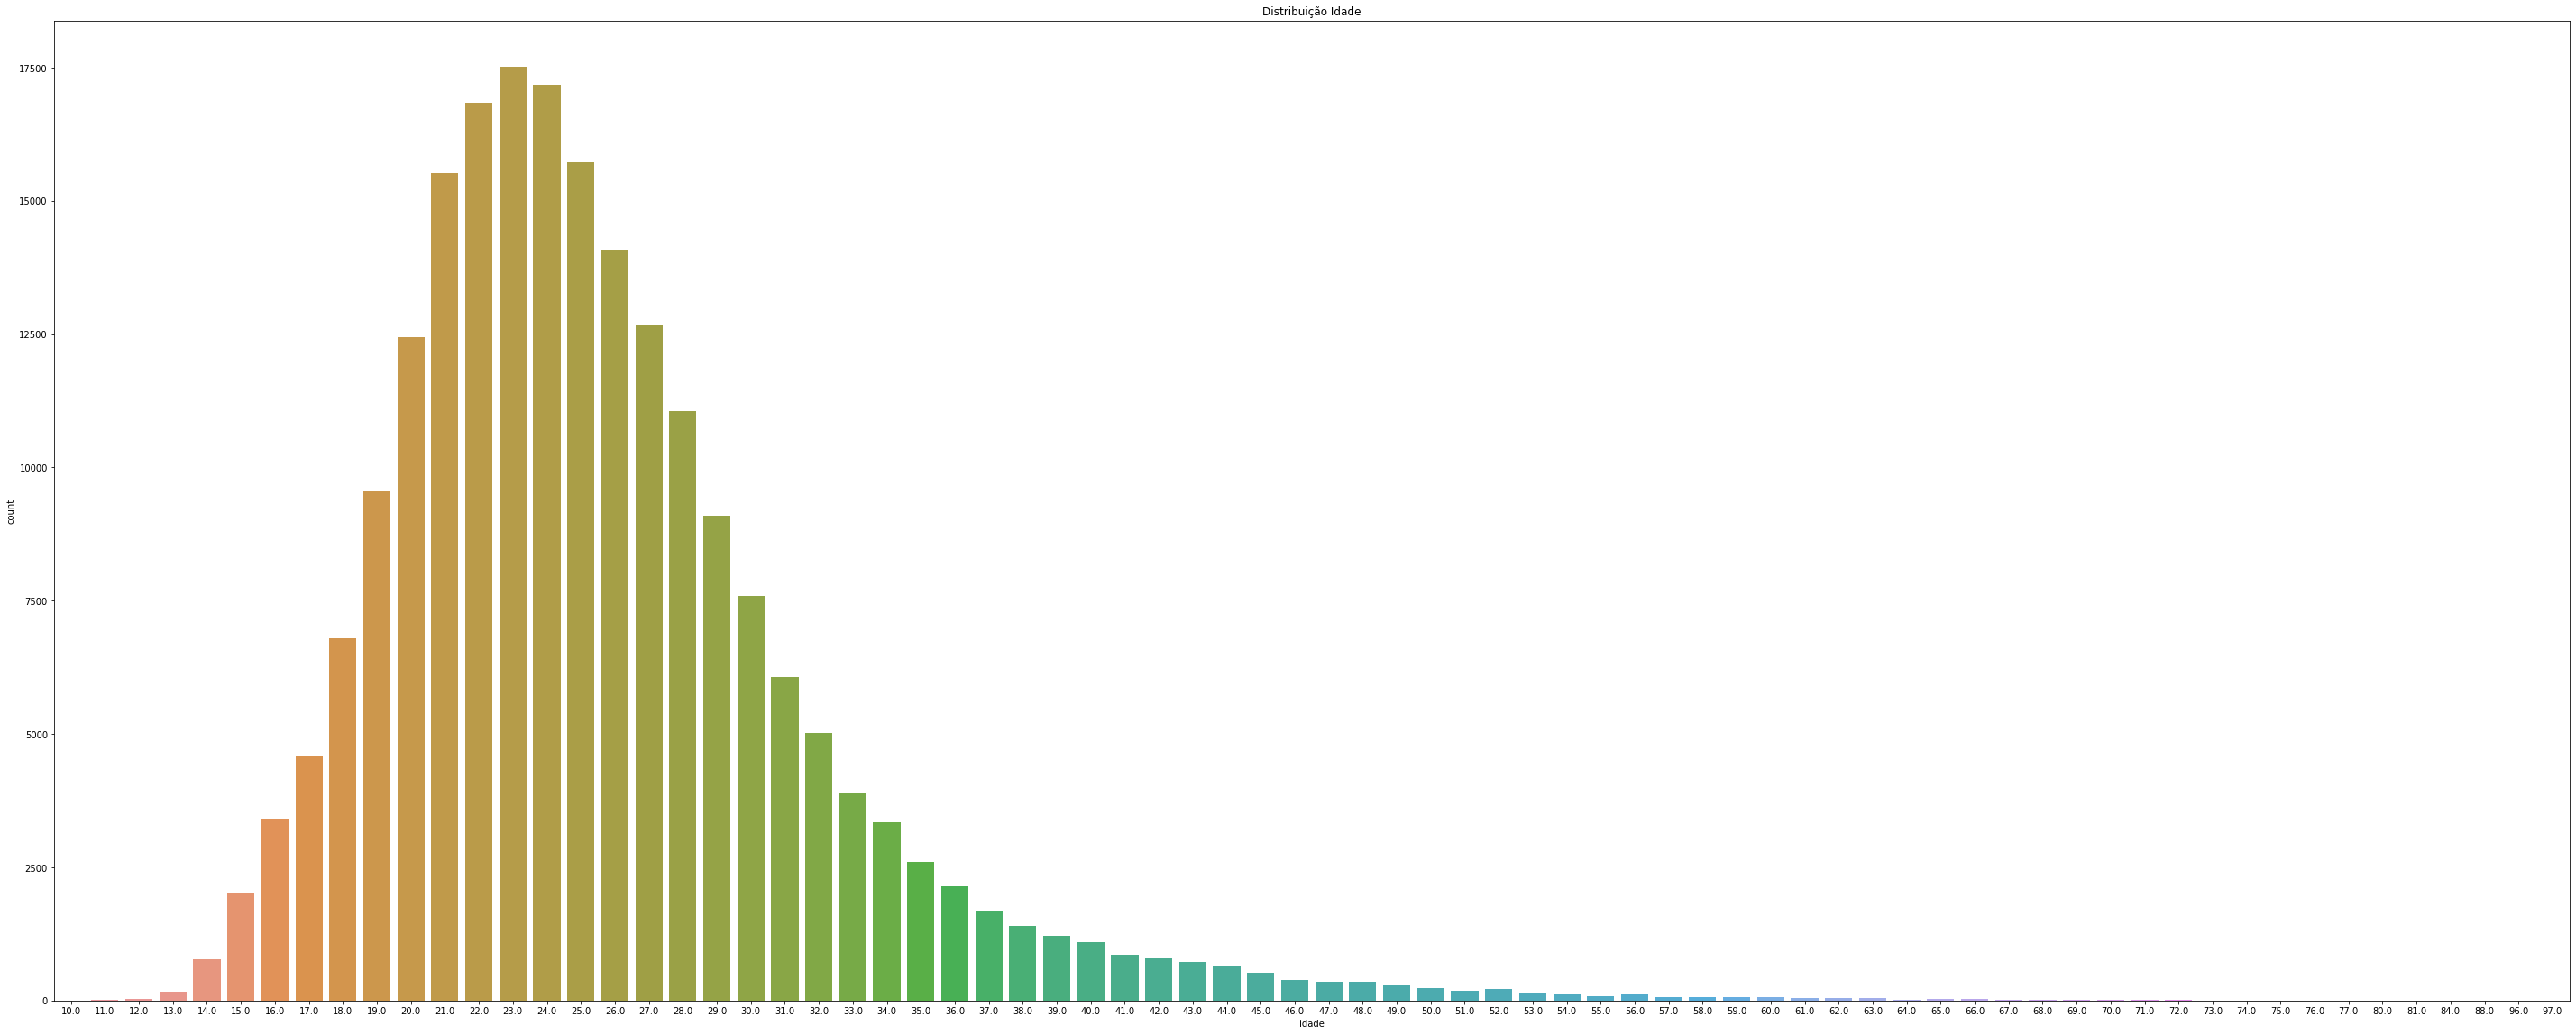

In [39]:
plt.figure(figsize=(50,20))
plt.tight_layout()
sns.countplot(df_atleta["idade"])
plt.title("Distribuição Idade")

In [40]:
df_atleta.head()

,id_atleta,nome_atleta,sexo_atleta,idade,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


### altura_atleta - Altura_atleta

In [41]:
df_atleta["altura_atleta"].nunique()

95

In [42]:
df_atleta["altura_atleta"].min()

127.0

In [43]:
df_atleta["altura_atleta"].max()

226.0

In [44]:
df_atleta["altura_atleta"].describe()

count    170667.000000
mean        175.515560
std          10.914843
min         127.000000
25%         168.000000
50%         175.000000
75%         183.000000
max         226.000000
Name: altura_atleta, dtype: float64

In [45]:
df_atleta[df_atleta["altura_atleta"] == 127.0]

,id_atleta,nome_atleta,sexo_atleta,idade,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha
29333,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Individual All-Around,NaN
29334,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Team All-Around,NaN
29335,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Floor Exercise,NaN
29336,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Horse Vault,NaN
29337,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Uneven Bars,NaN
29338,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Balance Beam,NaN
164821,82769,Lyton Levison Mphande,M,25.0,127.0,62.0,Malawi,MAW,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Light-Welterweight,NaN


In [49]:
df_atleta[df_atleta["altura_atleta"] == 96.0]

,id_atleta,nome_atleta,sexo_atleta,idade,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


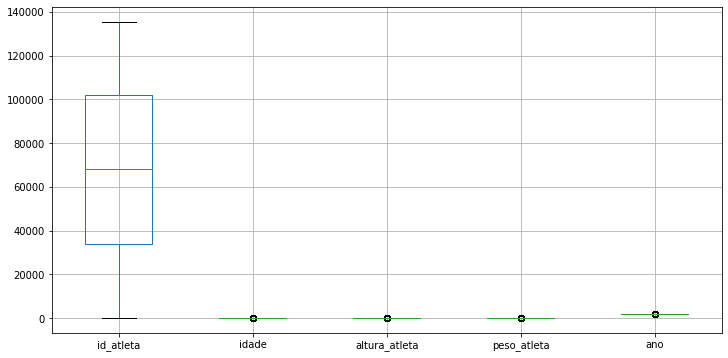

In [50]:
plt.figure(figsize=(12,6))
df_atleta.boxplot()

In [47]:
df_atleta_acima200 = df_atleta[df_atleta["altura_atleta"] >= 200.0]

In [48]:
df_atleta_acima200["modalidade_esportiva"].unique()

array(['Volleyball', 'Basketball', 'Rowing', 'Judo', 'Swimming',
       'Taekwondo', 'Athletics', 'Handball', 'Beach Volleyball', 'Tennis',
       'Wrestling', 'Water Polo', 'Sailing', 'Football', 'Canoeing',
       'Cycling', 'Boxing', 'Shooting', 'Weightlifting', 'Fencing',
       'Badminton', 'Hockey', 'Baseball'], dtype=object)

In [51]:
df_atleta.head()

,id_atleta,nome_atleta,sexo_atleta,idade,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


In [52]:
df_atleta["noc"].nunique()

230

In [53]:
df_atleta["noc"].unique()

array(['CHN', 'DEN', 'NED', 'FIN', 'NOR', 'ROU', 'EST', 'FRA', 'MAR',
       'ESP', 'EGY', 'IRI', 'BUL', 'ITA', 'CHA', 'AZE', 'SUD', 'RUS',
       'ARG', 'CUB', 'BLR', 'GRE', 'CMR', 'TUR', 'CHI', 'MEX', 'USA',
       'URS', 'NCA', 'HUN', 'NGR', 'ALG', 'KUW', 'BRN', 'PAK', 'IRQ',
       'UAR', 'LIB', 'QAT', 'MAS', 'GER', 'CAN', 'IRL', 'AUS', 'RSA',
       'ERI', 'TAN', 'JOR', 'TUN', 'LBA', 'BEL', 'DJI', 'PLE', 'COM',
       'KAZ', 'BRU', 'IND', 'KSA', 'SYR', 'MDV', 'ETH', 'UAE', 'YAR',
       'INA', 'PHI', 'SGP', 'UZB', 'KGZ', 'TJK', 'EUN', 'JPN', 'CGO',
       'SUI', 'BRA', 'GDR', 'MON', 'ISR', 'URU', 'SWE', 'SRI', 'ARM',
       'CIV', 'KEN', 'BEN', 'GBR', 'GHA', 'SOM', 'NIG', 'MLI', 'AFG',
       'POL', 'CRC', 'PAN', 'GEO', 'SLO', 'GUY', 'NZL', 'POR', 'PAR',
       'ANG', 'VEN', 'COL', 'FRG', 'BAN', 'PER', 'ESA', 'PUR', 'UGA',
       'HON', 'ECU', 'TKM', 'MRI', 'SEY', 'TCH', 'LUX', 'MTN', 'SKN',
       'TTO', 'DOM', 'VIN', 'JAM', 'LBR', 'SUR', 'NEP', 'MGL', 'AUT',
       'PLW', 'LTU',

In [54]:
df_noc = pd.read_csv("noc_regions.csv")

In [55]:
df_noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [56]:
df_noc.shape

(230, 3)

In [57]:
df_noc.isnull().sum()

NOC         0
region      3
notes     209
dtype: int64

In [58]:
df_noc.drop(columns="notes", inplace=True)

In [59]:
df_noc.isnull().sum()

NOC       0
region    3
dtype: int64

In [60]:
df_noc[df_noc.isnull().any(axis = 1)].head()

,NOC,region
168,ROT,NaN
208,TUV,NaN
213,UNK,NaN


In [61]:
df_noc.head()

,NOC,region
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


In [62]:
df_noc.rename(columns={"NOC": "noc"}, inplace=True)

In [63]:
df_atleta = df_atleta.merge(df_noc, on="noc")

In [64]:
df_atleta.head()

,id_atleta,nome_atleta,sexo_atleta,idade,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China


#Cidades

In [65]:
df_cities = pd.read_csv("/content/cities_olympics.csv")

In [66]:
df_cities.head()

,Host City,Host Country
0,Barcelona,ESP
1,London,GBR
2,Antwerpen,BEL
3,Paris,FRA
4,Calgary,CAN


In [68]:
df_cities.head()

,Host City,Host Country
0,Barcelona,ESP
1,London,GBR
2,Antwerpen,BEL
3,Paris,FRA
4,Calgary,CAN


In [69]:
df_cities.rename(columns={"Host City": "cidade_sede", "Host Country": "pais_sede"}, inplace=True)

In [70]:
df_cities.head()

,cidade_sede,pais_sede
0,Barcelona,ESP
1,London,GBR
2,Antwerpen,BEL
3,Paris,FRA
4,Calgary,CAN


In [71]:
df_atleta.shape

(220818, 16)

In [72]:
df_atleta.head()

,id_atleta,nome_atleta,sexo_atleta,idade,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China


In [73]:
df_cities.head()

,cidade_sede,pais_sede
0,Barcelona,ESP
1,London,GBR
2,Antwerpen,BEL
3,Paris,FRA
4,Calgary,CAN


In [74]:
df_atleta = df_atleta.merge(df_cities,  left_on ="cidade_sede", right_on ="cidade_sede")

In [75]:
df_atleta.head()

,id_atleta,nome_atleta,sexo_atleta,idade,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha,region,pais_sede
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,ESP
1,6848,Bai Chongguang,M,21.0,184.0,83.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Boxing,Boxing Men's Light-Heavyweight,NaN,China,ESP
2,6854,Bai Mei,F,17.0,166.0,46.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Individual,NaN,China,ESP
3,11225,Bi Zhong,M,23.0,188.0,110.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's Hammer Throw,NaN,China,ESP
4,17295,Cai Yanshu,M,28.0,169.0,79.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Weightlifting,Weightlifting Men's Light-Heavyweight,NaN,China,ESP


#Modalidade Esportiva

In [76]:
df_atleta["modalidade_esportiva"].nunique()

52

In [77]:
df_atleta["modalidade_esportiva"].unique()

array(['Basketball', 'Boxing', 'Rhythmic Gymnastics', 'Athletics',
       'Weightlifting', 'Rowing', 'Fencing', 'Judo', 'Volleyball',
       'Badminton', 'Swimming', 'Tennis', 'Wrestling', 'Table Tennis',
       'Shooting', 'Diving', 'Archery', 'Synchronized Swimming',
       'Gymnastics', 'Sailing', 'Cycling', 'Canoeing',
       'Modern Pentathlon', 'Football', 'Equestrianism', 'Hockey',
       'Water Polo', 'Handball', 'Baseball', 'Triathlon',
       'Art Competitions', 'Trampolining', 'Taekwondo',
       'Beach Volleyball', 'Motorboating', 'Figure Skating', 'Tug-Of-War',
       'Jeu De Paume', 'Lacrosse', 'Racquets', 'Polo', 'Rugby',
       'Softball', 'Golf', 'Rugby Sevens', 'Alpinism', 'Aeronautics',
       'Ice Hockey', 'Cricket', 'Croquet', 'Basque Pelota', 'Roque'],
      dtype=object)

#Medalha

In [78]:
df_atleta["medalha"].nunique()

3

In [79]:
df_atleta["medalha"].unique()

array([nan, 'Gold', 'Silver', 'Bronze'], dtype=object)

In [80]:
df_atleta.head()

,id_atleta,nome_atleta,sexo_atleta,idade,altura_atleta,peso_atleta,equipe,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha,region,pais_sede
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,ESP
1,6848,Bai Chongguang,M,21.0,184.0,83.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Boxing,Boxing Men's Light-Heavyweight,NaN,China,ESP
2,6854,Bai Mei,F,17.0,166.0,46.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Individual,NaN,China,ESP
3,11225,Bi Zhong,M,23.0,188.0,110.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's Hammer Throw,NaN,China,ESP
4,17295,Cai Yanshu,M,28.0,169.0,79.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Weightlifting,Weightlifting Men's Light-Heavyweight,NaN,China,ESP


In [81]:
df_atleta.drop(["id_atleta", "idade", "altura_atleta", "peso_atleta", "equipe"], axis = 1, inplace=True)

In [82]:
df_atleta.head()

,nome_atleta,sexo_atleta,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha,region,pais_sede
0,A Dijiang,M,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,ESP
1,Bai Chongguang,M,CHN,1992 Summer,1992,Summer,Barcelona,Boxing,Boxing Men's Light-Heavyweight,NaN,China,ESP
2,Bai Mei,F,CHN,1992 Summer,1992,Summer,Barcelona,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Individual,NaN,China,ESP
3,Bi Zhong,M,CHN,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's Hammer Throw,NaN,China,ESP
4,Cai Yanshu,M,CHN,1992 Summer,1992,Summer,Barcelona,Weightlifting,Weightlifting Men's Light-Heavyweight,NaN,China,ESP


#Feature Engeening

In [87]:
df_atleta["temporada"].nunique()

1

In [88]:
df_atleta["temporada"].unique()

array(['Summer'], dtype=object)

In [89]:
df_atleta["verao"] = df_atleta["temporada"] == "Summer"

In [90]:
df_atleta.head()

,nome_atleta,sexo_atleta,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha,region,pais_sede,verao
0,A Dijiang,M,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,ESP,True
1,Bai Chongguang,M,CHN,1992 Summer,1992,Summer,Barcelona,Boxing,Boxing Men's Light-Heavyweight,NaN,China,ESP,True
2,Bai Mei,F,CHN,1992 Summer,1992,Summer,Barcelona,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Individual,NaN,China,ESP,True
3,Bi Zhong,M,CHN,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's Hammer Throw,NaN,China,ESP,True
4,Cai Yanshu,M,CHN,1992 Summer,1992,Summer,Barcelona,Weightlifting,Weightlifting Men's Light-Heavyweight,NaN,China,ESP,True


In [91]:
df_atleta["verao"] = df_atleta["verao"].astype(int)

In [92]:
df_atleta.head()

,nome_atleta,sexo_atleta,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha,region,pais_sede,verao
0,A Dijiang,M,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,ESP,1
1,Bai Chongguang,M,CHN,1992 Summer,1992,Summer,Barcelona,Boxing,Boxing Men's Light-Heavyweight,NaN,China,ESP,1
2,Bai Mei,F,CHN,1992 Summer,1992,Summer,Barcelona,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Individual,NaN,China,ESP,1
3,Bi Zhong,M,CHN,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's Hammer Throw,NaN,China,ESP,1
4,Cai Yanshu,M,CHN,1992 Summer,1992,Summer,Barcelona,Weightlifting,Weightlifting Men's Light-Heavyweight,NaN,China,ESP,1


#Sexo Atleta

In [93]:
df_atleta["feminino"] = df_atleta["sexo_atleta"] == "F"

In [94]:
df_atleta.head()

,nome_atleta,sexo_atleta,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha,region,pais_sede,verao,feminino
0,A Dijiang,M,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,ESP,1,False
1,Bai Chongguang,M,CHN,1992 Summer,1992,Summer,Barcelona,Boxing,Boxing Men's Light-Heavyweight,NaN,China,ESP,1,False
2,Bai Mei,F,CHN,1992 Summer,1992,Summer,Barcelona,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Individual,NaN,China,ESP,1,True
3,Bi Zhong,M,CHN,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's Hammer Throw,NaN,China,ESP,1,False
4,Cai Yanshu,M,CHN,1992 Summer,1992,Summer,Barcelona,Weightlifting,Weightlifting Men's Light-Heavyweight,NaN,China,ESP,1,False


In [95]:
df_atleta["feminino"] = df_atleta["feminino"].astype(int)

In [96]:
df_atleta.head()

,nome_atleta,sexo_atleta,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha,region,pais_sede,verao,feminino
0,A Dijiang,M,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,ESP,1,0
1,Bai Chongguang,M,CHN,1992 Summer,1992,Summer,Barcelona,Boxing,Boxing Men's Light-Heavyweight,NaN,China,ESP,1,0
2,Bai Mei,F,CHN,1992 Summer,1992,Summer,Barcelona,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Individual,NaN,China,ESP,1,1
3,Bi Zhong,M,CHN,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's Hammer Throw,NaN,China,ESP,1,0
4,Cai Yanshu,M,CHN,1992 Summer,1992,Summer,Barcelona,Weightlifting,Weightlifting Men's Light-Heavyweight,NaN,China,ESP,1,0


#Em Casa

In [97]:
df_atleta["em_casa"] = df_atleta["noc"] == df_atleta["pais_sede"]

In [98]:
df_atleta.head()

,nome_atleta,sexo_atleta,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha,region,pais_sede,verao,feminino,em_casa
0,A Dijiang,M,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,ESP,1,0,False
1,Bai Chongguang,M,CHN,1992 Summer,1992,Summer,Barcelona,Boxing,Boxing Men's Light-Heavyweight,NaN,China,ESP,1,0,False
2,Bai Mei,F,CHN,1992 Summer,1992,Summer,Barcelona,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Individual,NaN,China,ESP,1,1,False
3,Bi Zhong,M,CHN,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's Hammer Throw,NaN,China,ESP,1,0,False
4,Cai Yanshu,M,CHN,1992 Summer,1992,Summer,Barcelona,Weightlifting,Weightlifting Men's Light-Heavyweight,NaN,China,ESP,1,0,False


In [99]:
df_atleta["em_casa"] = df_atleta["em_casa"].astype(int)

In [100]:
df_atleta.head()

,nome_atleta,sexo_atleta,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha,region,pais_sede,verao,feminino,em_casa
0,A Dijiang,M,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,ESP,1,0,0
1,Bai Chongguang,M,CHN,1992 Summer,1992,Summer,Barcelona,Boxing,Boxing Men's Light-Heavyweight,NaN,China,ESP,1,0,0
2,Bai Mei,F,CHN,1992 Summer,1992,Summer,Barcelona,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Individual,NaN,China,ESP,1,1,0
3,Bi Zhong,M,CHN,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's Hammer Throw,NaN,China,ESP,1,0,0
4,Cai Yanshu,M,CHN,1992 Summer,1992,Summer,Barcelona,Weightlifting,Weightlifting Men's Light-Heavyweight,NaN,China,ESP,1,0,0


#Medalhas

In [101]:
df_atleta["ouro"] = df_atleta["medalha"] == "Gold"

In [102]:
df_atleta.head()

,nome_atleta,sexo_atleta,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha,region,pais_sede,verao,feminino,em_casa,ouro
0,A Dijiang,M,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,ESP,1,0,0,False
1,Bai Chongguang,M,CHN,1992 Summer,1992,Summer,Barcelona,Boxing,Boxing Men's Light-Heavyweight,NaN,China,ESP,1,0,0,False
2,Bai Mei,F,CHN,1992 Summer,1992,Summer,Barcelona,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Individual,NaN,China,ESP,1,1,0,False
3,Bi Zhong,M,CHN,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's Hammer Throw,NaN,China,ESP,1,0,0,False
4,Cai Yanshu,M,CHN,1992 Summer,1992,Summer,Barcelona,Weightlifting,Weightlifting Men's Light-Heavyweight,NaN,China,ESP,1,0,0,False


In [103]:
df_atleta["ouro"] = df_atleta["ouro"].astype(int)

In [104]:
df_atleta["prata"] = df_atleta["medalha"] == "Silver"

In [105]:
df_atleta["prata"] = df_atleta["prata"].astype(int)

In [106]:
df_atleta["bronze"] = df_atleta["medalha"] == "Bronze"

In [107]:
df_atleta["bronze"] = df_atleta["bronze"].astype(int)

In [108]:
df_atleta.tail()

,nome_atleta,sexo_atleta,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha,region,pais_sede,verao,feminino,em_casa,ouro,prata,bronze
220813,Julius Lenhart,M,AUT,1904 Summer,1904,Summer,St. Louis,Gymnastics,Gymnastics Men's Team All-Around,Gold,Austria,USA,1,0,0,1,0,0
220814,Otto Wahle,M,AUT,1904 Summer,1904,Summer,St. Louis,Swimming,Swimming Men's 440 yard Freestyle,Bronze,Austria,USA,1,0,0,0,0,1
220815,Otto Wahle,M,AUT,1904 Summer,1904,Summer,St. Louis,Swimming,Swimming Men's 880 yard Freestyle,NaN,Austria,USA,1,0,0,0,0,0
220816,Otto Wahle,M,AUT,1904 Summer,1904,Summer,St. Louis,Swimming,Swimming Men's One Mile Freestyle,NaN,Austria,USA,1,0,0,0,0,0
220817,"Robert Arthur ""Bob"" Fowler",M,NFL,1904 Summer,1904,Summer,St. Louis,Athletics,Athletics Men's Marathon,NaN,Canada,USA,1,0,0,0,0,0


In [109]:
df_medalhas = pd.DataFrame(df_atleta.groupby(["ano", "noc", "region"])['nome_atleta','modalidade_esportiva', 'evento'].nunique())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [110]:
df_medalhas

nome_atleta  modalidade_esportiva  evento
ano  noc region                                                  
1896 AUS Australia                1                     2       5
     AUT Austria                  3                     3       8
     DEN Denmark                  3                     5      12
     FRA France                  12                     6      18
     GBR UK                      10                     7      19
...                             ...                   ...     ...
2016 VIE Vietnam                 22                    10      24
     VIN Saint Vincent            4                     2       4
     YEM Yemen                    3                     3       3
     ZAM Zambia                   7                     4       7
     ZIM Zimbabwe                30                     7      13

[2789 rows x 3 columns]

In [111]:
df_gb = pd.DataFrame(df_atleta.groupby(["ano", "noc", "region", "nome_atleta"])['feminino'].mean())

In [112]:
df_gb.tail()

feminino
ano  noc region   nome_atleta                
2016 ZIM Zimbabwe Sean Michael Gunn       0.0
                  Sheila Makoto           1.0
                  Talent Mandaza          1.0
                  Tatenda Tsumba          0.0
                  Wirimai Juwawo          0.0

In [113]:
df_gb = df_gb.groupby(["ano", "noc", "region"]).sum()

In [114]:
df_gb

feminino
ano  noc region                 
1896 AUS Australia           0.0
     AUT Austria             0.0
     DEN Denmark             0.0
     FRA France              0.0
     GBR UK                  0.0
...                          ...
2016 VIE Vietnam            12.0
     VIN Saint Vincent       2.0
     YEM Yemen               1.0
     ZAM Zambia              2.0
     ZIM Zimbabwe           21.0

[2789 rows x 1 columns]

In [115]:
df_medalhas.head()

nome_atleta  modalidade_esportiva  evento
ano  noc region                                              
1896 AUS Australia            1                     2       5
     AUT Austria              3                     3       8
     DEN Denmark              3                     5      12
     FRA France              12                     6      18
     GBR UK                  10                     7      19

In [116]:
df_medalhas = df_medalhas.merge(df_gb, left_index=True, right_index=True)

In [117]:
df_medalhas.tail()

nome_atleta  modalidade_esportiva  evento  feminino
ano  noc region                                                            
2016 VIE Vietnam                 22                    10      24      12.0
     VIN Saint Vincent            4                     2       4       2.0
     YEM Yemen                    3                     3       3       1.0
     ZAM Zambia                   7                     4       7       2.0
     ZIM Zimbabwe                30                     7      13      21.0

In [118]:
df_gb = pd.DataFrame(df_atleta.groupby(['ano', 'noc', 'region', 'evento'])['medalha'].nunique())

In [119]:
df_gb

medalha
ano  noc region    evento                                         
1896 AUS Australia Athletics Men's 1,500 metres                  1
                   Athletics Men's 800 metres                    1
                   Athletics Men's Marathon                      0
                   Tennis Men's Doubles                          1
                   Tennis Men's Singles                          0
...                                                            ...
2016 ZIM Zimbabwe  Rowing Women's Single Sculls                  0
                   Shooting Men's Double Trap                    0
                   Swimming Men's 100 metres Freestyle           0
                   Swimming Women's 100 metres Backstroke        0
                   Swimming Women's 200 metres Backstroke        0

[97901 rows x 1 columns]

In [120]:
df_gb = df_gb.groupby(['ano', 'noc', 'region']).sum()

In [121]:
df_gb

medalha
ano  noc region                
1896 AUS Australia            3
     AUT Austria              5
     DEN Denmark              6
     FRA France              11
     GBR UK                   9
...                         ...
2016 VIE Vietnam              2
     VIN Saint Vincent        0
     YEM Yemen                0
     ZAM Zambia               0
     ZIM Zimbabwe             0

[2789 rows x 1 columns]

In [122]:
df_medalhas.head()

nome_atleta  modalidade_esportiva  evento  feminino
ano  noc region                                                        
1896 AUS Australia            1                     2       5       0.0
     AUT Austria              3                     3       8       0.0
     DEN Denmark              3                     5      12       0.0
     FRA France              12                     6      18       0.0
     GBR UK                  10                     7      19       0.0

In [123]:
df_medalhas = df_medalhas.merge(df_gb, left_index=True, right_index=True)

In [124]:
df_medalhas.head()

nome_atleta  modalidade_esportiva  ...  feminino  medalha
ano  noc region                                        ...                   
1896 AUS Australia            1                     2  ...       0.0        3
     AUT Austria              3                     3  ...       0.0        5
     DEN Denmark              3                     5  ...       0.0        6
     FRA France              12                     6  ...       0.0       11
     GBR UK                  10                     7  ...       0.0        9

[5 rows x 5 columns]

In [125]:
df_gb = df_atleta.groupby(['ano', 'noc', 'region', 'evento'])["ouro", "prata", "bronze"].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [126]:
df_gb

ouro  prata  bronze
ano  noc region    evento                                                     
1896 AUS Australia Athletics Men's 1,500 metres               1      0       0
                   Athletics Men's 800 metres                 1      0       0
                   Athletics Men's Marathon                   0      0       0
                   Tennis Men's Doubles                       0      0       1
                   Tennis Men's Singles                       0      0       0
...                                                         ...    ...     ...
2016 ZIM Zimbabwe  Rowing Women's Single Sculls               0      0       0
                   Shooting Men's Double Trap                 0      0       0
                   Swimming Men's 100 metres Freestyle        0      0       0
                   Swimming Women's 100 metres Backstroke     0      0       0
                   Swimming Women's 200 metres Backstroke     0      0       0

[97901 rows x 3 columns]

In [127]:
df_gb = df_gb.clip(upper=1)

In [128]:
df_gb

ouro  prata  bronze
ano  noc region    evento                                                     
1896 AUS Australia Athletics Men's 1,500 metres               1      0       0
                   Athletics Men's 800 metres                 1      0       0
                   Athletics Men's Marathon                   0      0       0
                   Tennis Men's Doubles                       0      0       1
                   Tennis Men's Singles                       0      0       0
...                                                         ...    ...     ...
2016 ZIM Zimbabwe  Rowing Women's Single Sculls               0      0       0
                   Shooting Men's Double Trap                 0      0       0
                   Swimming Men's 100 metres Freestyle        0      0       0
                   Swimming Women's 100 metres Backstroke     0      0       0
                   Swimming Women's 200 metres Backstroke     0      0       0

[97901 rows x 3 columns]

In [129]:
df_gb = df_gb.groupby(['ano', 'noc', 'region']).sum()

In [130]:
df_gb

ouro  prata  bronze
ano  noc region                            
1896 AUS Australia         2      0       1
     AUT Austria           2      1       2
     DEN Denmark           1      2       3
     FRA France            5      4       2
     GBR UK                3      3       3
...                      ...    ...     ...
2016 VIE Vietnam           1      1       0
     VIN Saint Vincent     0      0       0
     YEM Yemen             0      0       0
     ZAM Zambia            0      0       0
     ZIM Zimbabwe          0      0       0

[2789 rows x 3 columns]

In [131]:
df_medalhas

nome_atleta  modalidade_esportiva  ...  feminino  medalha
ano  noc region                                            ...                   
1896 AUS Australia                1                     2  ...       0.0        3
     AUT Austria                  3                     3  ...       0.0        5
     DEN Denmark                  3                     5  ...       0.0        6
     FRA France                  12                     6  ...       0.0       11
     GBR UK                      10                     7  ...       0.0        9
...                             ...                   ...  ...       ...      ...
2016 VIE Vietnam                 22                    10  ...      12.0        2
     VIN Saint Vincent            4                     2  ...       2.0        0
     YEM Yemen                    3                     3  ...       1.0        0
     ZAM Zambia                   7                     4  ...       2.0        0
     ZIM Zimbabwe                30                     7  ...      21.0        0

[2789 rows x 5 columns]

In [132]:
df_medalhas = df_medalhas.merge(df_gb, left_index=True, right_index=True)

In [133]:
df_medalhas.head()

nome_atleta  modalidade_esportiva  ...  prata  bronze
ano  noc region                                        ...               
1896 AUS Australia            1                     2  ...      0       1
     AUT Austria              3                     3  ...      1       2
     DEN Denmark              3                     5  ...      2       3
     FRA France              12                     6  ...      4       2
     GBR UK                  10                     7  ...      3       3

[5 rows x 8 columns]

In [134]:
df_atleta.head()

,nome_atleta,sexo_atleta,noc,ano_temporada,ano,temporada,cidade_sede,modalidade_esportiva,evento,medalha,region,pais_sede,verao,feminino,em_casa,ouro,prata,bronze
0,A Dijiang,M,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,ESP,1,0,0,0,0,0
1,Bai Chongguang,M,CHN,1992 Summer,1992,Summer,Barcelona,Boxing,Boxing Men's Light-Heavyweight,NaN,China,ESP,1,0,0,0,0,0
2,Bai Mei,F,CHN,1992 Summer,1992,Summer,Barcelona,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Individual,NaN,China,ESP,1,1,0,0,0,0
3,Bi Zhong,M,CHN,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's Hammer Throw,NaN,China,ESP,1,0,0,0,0,0
4,Cai Yanshu,M,CHN,1992 Summer,1992,Summer,Barcelona,Weightlifting,Weightlifting Men's Light-Heavyweight,NaN,China,ESP,1,0,0,0,0,0


In [135]:
df_gb = pd.DataFrame(df_atleta.groupby(['ano','noc','region'])['verao','ano','em_casa'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [136]:
df_gb

verao     ano  em_casa
ano  noc region                               
1896 AUS Australia        1.0  1896.0      0.0
     AUT Austria          1.0  1896.0      0.0
     DEN Denmark          1.0  1896.0      0.0
     FRA France           1.0  1896.0      0.0
     GBR UK               1.0  1896.0      0.0
...                       ...     ...      ...
2016 VIE Vietnam          1.0  2016.0      0.0
     VIN Saint Vincent    1.0  2016.0      0.0
     YEM Yemen            1.0  2016.0      0.0
     ZAM Zambia           1.0  2016.0      0.0
     ZIM Zimbabwe         1.0  2016.0      0.0

[2789 rows x 3 columns]

In [137]:
df_medalhas

nome_atleta  modalidade_esportiva  ...  prata  bronze
ano  noc region                                            ...               
1896 AUS Australia                1                     2  ...      0       1
     AUT Austria                  3                     3  ...      1       2
     DEN Denmark                  3                     5  ...      2       3
     FRA France                  12                     6  ...      4       2
     GBR UK                      10                     7  ...      3       3
...                             ...                   ...  ...    ...     ...
2016 VIE Vietnam                 22                    10  ...      1       0
     VIN Saint Vincent            4                     2  ...      0       0
     YEM Yemen                    3                     3  ...      0       0
     ZAM Zambia                   7                     4  ...      0       0
     ZIM Zimbabwe                30                     7  ...      0       0

[2789 rows x 8 columns]

In [138]:
df_medalhas = df_medalhas.merge(df_gb, left_index=True, right_index=True)

In [139]:
df_medalhas.head()

nome_atleta  modalidade_esportiva  ...     ano  em_casa
ano  noc region                                        ...                 
1896 AUS Australia            1                     2  ...  1896.0      0.0
     AUT Austria              3                     3  ...  1896.0      0.0
     DEN Denmark              3                     5  ...  1896.0      0.0
     FRA France              12                     6  ...  1896.0      0.0
     GBR UK                  10                     7  ...  1896.0      0.0

[5 rows x 11 columns]

In [140]:
df_medalhas.drop(columns="ano", inplace=True)

In [141]:
df_medalhas = df_medalhas.reset_index()

In [142]:
df_medalhas.head()

,ano,noc,region,nome_atleta,modalidade_esportiva,evento,feminino,medalha,ouro,prata,bronze,verao,em_casa
0,1896,AUS,Australia,1,2,5,0.0,3,2,0,1,1.0,0.0
1,1896,AUT,Austria,3,3,8,0.0,5,2,1,2,1.0,0.0
2,1896,DEN,Denmark,3,5,12,0.0,6,1,2,3,1.0,0.0
3,1896,FRA,France,12,6,18,0.0,11,5,4,2,1.0,0.0
4,1896,GBR,UK,10,7,19,0.0,9,3,3,3,1.0,0.0


In [143]:
df_medalhas.rename(columns={"nome_atleta": "num_atleta"}, inplace=True)

In [144]:
df_medalhas['atletas_por_modalidade'] = (df_medalhas['num_atleta'] / df_medalhas['evento']).round(2)

In [145]:
df_medalhas.head()

,ano,noc,region,num_atleta,modalidade_esportiva,evento,feminino,medalha,ouro,prata,bronze,verao,em_casa,atletas_por_modalidade
0,1896,AUS,Australia,1,2,5,0.0,3,2,0,1,1.0,0.0,0.20
1,1896,AUT,Austria,3,3,8,0.0,5,2,1,2,1.0,0.0,0.38
2,1896,DEN,Denmark,3,5,12,0.0,6,1,2,3,1.0,0.0,0.25
3,1896,FRA,France,12,6,18,0.0,11,5,4,2,1.0,0.0,0.67
4,1896,GBR,UK,10,7,19,0.0,9,3,3,3,1.0,0.0,0.53


In [146]:
df_medalhas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2789 entries, 0 to 2788
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ano                     2789 non-null   int64  
 1   noc                     2789 non-null   object 
 2   region                  2789 non-null   object 
 3   num_atleta              2789 non-null   int64  
 4   modalidade_esportiva    2789 non-null   int64  
 5   evento                  2789 non-null   int64  
 6   feminino                2789 non-null   float64
 7   medalha                 2789 non-null   int64  
 8   ouro                    2789 non-null   int64  
 9   prata                   2789 non-null   int64  
 10  bronze                  2789 non-null   int64  
 11  verao                   2789 non-null   float64
 12  em_casa                 2789 non-null   float64
 13  atletas_por_modalidade  2789 non-null   float64
dtypes: float64(4), int64(8), object(2)
memor

In [147]:
df_medalhas.head()

,ano,noc,region,num_atleta,modalidade_esportiva,evento,feminino,medalha,ouro,prata,bronze,verao,em_casa,atletas_por_modalidade
0,1896,AUS,Australia,1,2,5,0.0,3,2,0,1,1.0,0.0,0.20
1,1896,AUT,Austria,3,3,8,0.0,5,2,1,2,1.0,0.0,0.38
2,1896,DEN,Denmark,3,5,12,0.0,6,1,2,3,1.0,0.0,0.25
3,1896,FRA,France,12,6,18,0.0,11,5,4,2,1.0,0.0,0.67
4,1896,GBR,UK,10,7,19,0.0,9,3,3,3,1.0,0.0,0.53


#Dummy Variables

In [148]:
model = pd.get_dummies(data=df_medalhas, columns=['noc'])

In [149]:
model.shape

(2789, 239)

In [150]:
model

,ano,region,num_atleta,modalidade_esportiva,evento,feminino,medalha,ouro,prata,bronze,verao,em_casa,atletas_por_modalidade,noc_AFG,noc_AHO,noc_ALB,noc_ALG,noc_AND,noc_ANG,noc_ANT,noc_ANZ,noc_ARG,noc_ARM,noc_ARU,noc_ASA,noc_AUS,noc_AUT,noc_AZE,noc_BAH,noc_BAN,noc_BAR,noc_BDI,noc_BEL,noc_BEN,noc_BER,noc_BHU,noc_BIH,noc_BIZ,noc_BLR,noc_BOH,...,noc_STP,noc_SUD,noc_SUI,noc_SUR,noc_SVK,noc_SWE,noc_SWZ,noc_SYR,noc_TAN,noc_TCH,noc_TGA,noc_THA,noc_TJK,noc_TKM,noc_TLS,noc_TOG,noc_TPE,noc_TTO,noc_TUN,noc_TUR,noc_UAE,noc_UAR,noc_UGA,noc_UKR,noc_URS,noc_URU,noc_USA,noc_UZB,noc_VAN,noc_VEN,noc_VIE,noc_VIN,noc_VNM,noc_WIF,noc_YAR,noc_YEM,noc_YMD,noc_YUG,noc_ZAM,noc_ZIM
0,1896,Australia,1,2,5,0.0,3,2,0,1,1.0,0.0,0.20,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1896,Austria,3,3,8,0.0,5,2,1,2,1.0,0.0,0.38,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1896,Denmark,3,5,12,0.0,6,1,2,3,1.0,0.0,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1896,France,12,6,18,0.0,11,5,4,2,1.0,0.0,0.67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1896,UK,10,7,19,0.0,9,3,3,3,1.0,0.0,0.53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784,2016,Vietnam,22,10,24,12.0,2,1,1,0,1.0,0.0,0.92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2785,2016,Saint Vincent,4,2,4,2.0,0,0,0,0,1.0,0.0,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2786,2016,Yemen,3,3,3,1.0,0,0,0,0,1.0,0.0,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2787,2016,Zambia,7,4,7,2.0,0,0,0,0,1.0,0.0,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [151]:
model["noc"] = df_medalhas['noc']

In [152]:
model

,ano,region,num_atleta,modalidade_esportiva,evento,feminino,medalha,ouro,prata,bronze,verao,em_casa,atletas_por_modalidade,noc_AFG,noc_AHO,noc_ALB,noc_ALG,noc_AND,noc_ANG,noc_ANT,noc_ANZ,noc_ARG,noc_ARM,noc_ARU,noc_ASA,noc_AUS,noc_AUT,noc_AZE,noc_BAH,noc_BAN,noc_BAR,noc_BDI,noc_BEL,noc_BEN,noc_BER,noc_BHU,noc_BIH,noc_BIZ,noc_BLR,noc_BOH,...,noc_SUD,noc_SUI,noc_SUR,noc_SVK,noc_SWE,noc_SWZ,noc_SYR,noc_TAN,noc_TCH,noc_TGA,noc_THA,noc_TJK,noc_TKM,noc_TLS,noc_TOG,noc_TPE,noc_TTO,noc_TUN,noc_TUR,noc_UAE,noc_UAR,noc_UGA,noc_UKR,noc_URS,noc_URU,noc_USA,noc_UZB,noc_VAN,noc_VEN,noc_VIE,noc_VIN,noc_VNM,noc_WIF,noc_YAR,noc_YEM,noc_YMD,noc_YUG,noc_ZAM,noc_ZIM,noc
0,1896,Australia,1,2,5,0.0,3,2,0,1,1.0,0.0,0.20,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,AUS
1,1896,Austria,3,3,8,0.0,5,2,1,2,1.0,0.0,0.38,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,AUT
2,1896,Denmark,3,5,12,0.0,6,1,2,3,1.0,0.0,0.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,DEN
3,1896,France,12,6,18,0.0,11,5,4,2,1.0,0.0,0.67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,FRA
4,1896,UK,10,7,19,0.0,9,3,3,3,1.0,0.0,0.53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784,2016,Vietnam,22,10,24,12.0,2,1,1,0,1.0,0.0,0.92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,VIE
2785,2016,Saint Vincent,4,2,4,2.0,0,0,0,0,1.0,0.0,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,VIN
2786,2016,Yemen,3,3,3,1.0,0,0,0,0,1.0,0.0,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,YEM
2787,2016,Zambia,7,4,7,2.0,0,0,0,0,1.0,0.0,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,ZAM


In [153]:
model = model[model['ano'] >= 1992]

In [154]:
print(model.shape)

(1372, 240)


In [155]:
model

,ano,region,num_atleta,modalidade_esportiva,evento,feminino,medalha,ouro,prata,bronze,verao,em_casa,atletas_por_modalidade,noc_AFG,noc_AHO,noc_ALB,noc_ALG,noc_AND,noc_ANG,noc_ANT,noc_ANZ,noc_ARG,noc_ARM,noc_ARU,noc_ASA,noc_AUS,noc_AUT,noc_AZE,noc_BAH,noc_BAN,noc_BAR,noc_BDI,noc_BEL,noc_BEN,noc_BER,noc_BHU,noc_BIH,noc_BIZ,noc_BLR,noc_BOH,...,noc_SUD,noc_SUI,noc_SUR,noc_SVK,noc_SWE,noc_SWZ,noc_SYR,noc_TAN,noc_TCH,noc_TGA,noc_THA,noc_TJK,noc_TKM,noc_TLS,noc_TOG,noc_TPE,noc_TTO,noc_TUN,noc_TUR,noc_UAE,noc_UAR,noc_UGA,noc_UKR,noc_URS,noc_URU,noc_USA,noc_UZB,noc_VAN,noc_VEN,noc_VIE,noc_VIN,noc_VNM,noc_WIF,noc_YAR,noc_YEM,noc_YMD,noc_YUG,noc_ZAM,noc_ZIM,noc
1417,1992,Curacao,4,3,4,1.0,0,0,0,0,1.0,0.0,1.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,AHO
1418,1992,Albania,7,4,8,2.0,0,0,0,0,1.0,0.0,0.88,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ALB
1419,1992,Algeria,35,7,27,2.0,2,1,0,1,1.0,0.0,1.30,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ALG
1420,1992,Andorra,8,5,5,1.0,0,0,0,0,1.0,0.0,1.60,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,AND
1421,1992,Angola,28,6,21,3.0,0,0,0,0,1.0,0.0,1.33,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ANG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784,2016,Vietnam,22,10,24,12.0,2,1,1,0,1.0,0.0,0.92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,VIE
2785,2016,Saint Vincent,4,2,4,2.0,0,0,0,0,1.0,0.0,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,VIN
2786,2016,Yemen,3,3,3,1.0,0,0,0,0,1.0,0.0,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,YEM
2787,2016,Zambia,7,4,7,2.0,0,0,0,0,1.0,0.0,1.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,ZAM


In [156]:
X = model[["ano", "noc", "region", "verao", "em_casa", "num_atleta", "evento", "atletas_por_modalidade", "noc_USA", 
          "noc_GER", "noc_GBR", "noc_FRA", "noc_ITA", "noc_SWE", "noc_RUS", "noc_AUS", "noc_BRA", "noc_JPN"]] 

In [158]:
X

,ano,noc,region,verao,em_casa,num_atleta,evento,atletas_por_modalidade,noc_USA,noc_GER,noc_GBR,noc_FRA,noc_ITA,noc_SWE,noc_RUS,noc_AUS,noc_BRA,noc_JPN
1417,1992,AHO,Curacao,1.0,0.0,4,4,1.00,0,0,0,0,0,0,0,0,0,0
1418,1992,ALB,Albania,1.0,0.0,7,8,0.88,0,0,0,0,0,0,0,0,0,0
1419,1992,ALG,Algeria,1.0,0.0,35,27,1.30,0,0,0,0,0,0,0,0,0,0
1420,1992,AND,Andorra,1.0,0.0,8,5,1.60,0,0,0,0,0,0,0,0,0,0
1421,1992,ANG,Angola,1.0,0.0,28,21,1.33,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784,2016,VIE,Vietnam,1.0,0.0,22,24,0.92,0,0,0,0,0,0,0,0,0,0
2785,2016,VIN,Saint Vincent,1.0,0.0,4,4,1.00,0,0,0,0,0,0,0,0,0,0
2786,2016,YEM,Yemen,1.0,0.0,3,3,1.00,0,0,0,0,0,0,0,0,0,0
2787,2016,ZAM,Zambia,1.0,0.0,7,7,1.00,0,0,0,0,0,0,0,0,0,0


In [159]:
X.shape

(1372, 18)

In [160]:
y = model[["medalha", "ouro", "prata", "bronze", "ano", "noc", "region"]]

In [161]:
y.shape

(1372, 7)

#Datases Treino

In [162]:
X[X["ano"] < 2016] 

,ano,noc,region,verao,em_casa,num_atleta,evento,atletas_por_modalidade,noc_USA,noc_GER,noc_GBR,noc_FRA,noc_ITA,noc_SWE,noc_RUS,noc_AUS,noc_BRA,noc_JPN
1417,1992,AHO,Curacao,1.0,0.0,4,4,1.00,0,0,0,0,0,0,0,0,0,0
1418,1992,ALB,Albania,1.0,0.0,7,8,0.88,0,0,0,0,0,0,0,0,0,0
1419,1992,ALG,Algeria,1.0,0.0,35,27,1.30,0,0,0,0,0,0,0,0,0,0
1420,1992,AND,Andorra,1.0,0.0,8,5,1.60,0,0,0,0,0,0,0,0,0,0
1421,1992,ANG,Angola,1.0,0.0,28,21,1.33,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2580,2012,VIE,Vietnam,1.0,0.0,18,23,0.78,0,0,0,0,0,0,0,0,0,0
2581,2012,VIN,Saint Vincent,1.0,0.0,3,3,1.00,0,0,0,0,0,0,0,0,0,0
2582,2012,YEM,Yemen,1.0,0.0,4,4,1.00,0,0,0,0,0,0,0,0,0,0
2583,2012,ZAM,Zambia,1.0,0.0,7,7,1.00,0,0,0,0,0,0,0,0,0,0


In [163]:
X_train = X[X["ano"] < 2016] 

In [164]:
X[X["ano"] == 2016] 

,ano,noc,region,verao,em_casa,num_atleta,evento,atletas_por_modalidade,noc_USA,noc_GER,noc_GBR,noc_FRA,noc_ITA,noc_SWE,noc_RUS,noc_AUS,noc_BRA,noc_JPN
2585,2016,AFG,Afghanistan,1.0,0.0,3,3,1.00,0,0,0,0,0,0,0,0,0,0
2586,2016,ALB,Albania,1.0,0.0,6,6,1.00,0,0,0,0,0,0,0,0,0,0
2587,2016,ALG,Algeria,1.0,0.0,64,48,1.33,0,0,0,0,0,0,0,0,0,0
2588,2016,AND,Andorra,1.0,0.0,4,4,1.00,0,0,0,0,0,0,0,0,0,0
2589,2016,ANG,Angola,1.0,0.0,26,10,2.60,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784,2016,VIE,Vietnam,1.0,0.0,22,24,0.92,0,0,0,0,0,0,0,0,0,0
2785,2016,VIN,Saint Vincent,1.0,0.0,4,4,1.00,0,0,0,0,0,0,0,0,0,0
2786,2016,YEM,Yemen,1.0,0.0,3,3,1.00,0,0,0,0,0,0,0,0,0,0
2787,2016,ZAM,Zambia,1.0,0.0,7,7,1.00,0,0,0,0,0,0,0,0,0,0


In [165]:
X_test = X[X["ano"] == 2016] 

In [166]:
X_train.head()

,ano,noc,region,verao,em_casa,num_atleta,evento,atletas_por_modalidade,noc_USA,noc_GER,noc_GBR,noc_FRA,noc_ITA,noc_SWE,noc_RUS,noc_AUS,noc_BRA,noc_JPN
1417,1992,AHO,Curacao,1.0,0.0,4,4,1.00,0,0,0,0,0,0,0,0,0,0
1418,1992,ALB,Albania,1.0,0.0,7,8,0.88,0,0,0,0,0,0,0,0,0,0
1419,1992,ALG,Algeria,1.0,0.0,35,27,1.30,0,0,0,0,0,0,0,0,0,0
1420,1992,AND,Andorra,1.0,0.0,8,5,1.60,0,0,0,0,0,0,0,0,0,0
1421,1992,ANG,Angola,1.0,0.0,28,21,1.33,0,0,0,0,0,0,0,0,0,0


In [167]:
X_test.head()

,ano,noc,region,verao,em_casa,num_atleta,evento,atletas_por_modalidade,noc_USA,noc_GER,noc_GBR,noc_FRA,noc_ITA,noc_SWE,noc_RUS,noc_AUS,noc_BRA,noc_JPN
2585,2016,AFG,Afghanistan,1.0,0.0,3,3,1.00,0,0,0,0,0,0,0,0,0,0
2586,2016,ALB,Albania,1.0,0.0,6,6,1.00,0,0,0,0,0,0,0,0,0,0
2587,2016,ALG,Algeria,1.0,0.0,64,48,1.33,0,0,0,0,0,0,0,0,0,0
2588,2016,AND,Andorra,1.0,0.0,4,4,1.00,0,0,0,0,0,0,0,0,0,0
2589,2016,ANG,Angola,1.0,0.0,26,10,2.60,0,0,0,0,0,0,0,0,0,0


In [168]:
X_test = X_test.reset_index().drop(['index'], axis=1)

In [169]:
X_test.head()

,ano,noc,region,verao,em_casa,num_atleta,evento,atletas_por_modalidade,noc_USA,noc_GER,noc_GBR,noc_FRA,noc_ITA,noc_SWE,noc_RUS,noc_AUS,noc_BRA,noc_JPN
0,2016,AFG,Afghanistan,1.0,0.0,3,3,1.00,0,0,0,0,0,0,0,0,0,0
1,2016,ALB,Albania,1.0,0.0,6,6,1.00,0,0,0,0,0,0,0,0,0,0
2,2016,ALG,Algeria,1.0,0.0,64,48,1.33,0,0,0,0,0,0,0,0,0,0
3,2016,AND,Andorra,1.0,0.0,4,4,1.00,0,0,0,0,0,0,0,0,0,0
4,2016,ANG,Angola,1.0,0.0,26,10,2.60,0,0,0,0,0,0,0,0,0,0


In [170]:
X.shape

(1372, 18)

In [171]:
X_train.shape

(1168, 18)

In [172]:
X_test.shape

(204, 18)

In [173]:
y.shape

(1372, 7)

In [174]:
y_train = y[y["ano"] < 2016] 

In [175]:
y_test = y[y["ano"] == 2016] 

In [176]:
y_test

,medalha,ouro,prata,bronze,ano,noc,region
2585,0,0,0,0,2016,AFG,Afghanistan
2586,0,0,0,0,2016,ALB,Albania
2587,2,0,2,0,2016,ALG,Algeria
2588,0,0,0,0,2016,AND,Andorra
2589,0,0,0,0,2016,ANG,Angola
...,...,...,...,...,...,...,...
2784,2,1,1,0,2016,VIE,Vietnam
2785,0,0,0,0,2016,VIN,Saint Vincent
2786,0,0,0,0,2016,YEM,Yemen
2787,0,0,0,0,2016,ZAM,Zambia


In [177]:
y_test = y_test.reset_index()

In [178]:
y_test.head()

,index,medalha,ouro,prata,bronze,ano,noc,region
0,2585,0,0,0,0,2016,AFG,Afghanistan
1,2586,0,0,0,0,2016,ALB,Albania
2,2587,2,0,2,0,2016,ALG,Algeria
3,2588,0,0,0,0,2016,AND,Andorra
4,2589,0,0,0,0,2016,ANG,Angola


In [179]:
y_test.columns

Index(['index', 'medalha', 'ouro', 'prata', 'bronze', 'ano', 'noc', 'region'], dtype='object')

In [180]:
y_test.drop(columns=["index"], inplace=True)

In [181]:
y_test.head()

,medalha,ouro,prata,bronze,ano,noc,region
0,0,0,0,0,2016,AFG,Afghanistan
1,0,0,0,0,2016,ALB,Albania
2,2,0,2,0,2016,ALG,Algeria
3,0,0,0,0,2016,AND,Andorra
4,0,0,0,0,2016,ANG,Angola


In [182]:
y_train.isnull().sum()

medalha    0
ouro       0
prata      0
bronze     0
ano        0
noc        0
region     0
dtype: int64

#Modelo Regressão Linear

In [186]:
linear_model_gold = LinearRegression()

In [187]:
linear_model_gold

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [188]:
X_train.head()

,ano,noc,region,verao,em_casa,num_atleta,evento,atletas_por_modalidade,noc_USA,noc_GER,noc_GBR,noc_FRA,noc_ITA,noc_SWE,noc_RUS,noc_AUS,noc_BRA,noc_JPN
1417,1992,AHO,Curacao,1.0,0.0,4,4,1.00,0,0,0,0,0,0,0,0,0,0
1418,1992,ALB,Albania,1.0,0.0,7,8,0.88,0,0,0,0,0,0,0,0,0,0
1419,1992,ALG,Algeria,1.0,0.0,35,27,1.30,0,0,0,0,0,0,0,0,0,0
1420,1992,AND,Andorra,1.0,0.0,8,5,1.60,0,0,0,0,0,0,0,0,0,0
1421,1992,ANG,Angola,1.0,0.0,28,21,1.33,0,0,0,0,0,0,0,0,0,0


In [189]:
y_train.head()

,medalha,ouro,prata,bronze,ano,noc,region
1417,0,0,0,0,1992,AHO,Curacao
1418,0,0,0,0,1992,ALB,Albania
1419,2,1,0,1,1992,ALG,Algeria
1420,0,0,0,0,1992,AND,Andorra
1421,0,0,0,0,1992,ANG,Angola


In [190]:
linear_model_gold.fit(X_train.drop(['ano','noc','region'], axis=1), y_train['ouro'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [191]:
X_train = X_train.drop(['ano','noc','region'], axis=1)

In [192]:
X_train.head()

,verao,em_casa,num_atleta,evento,atletas_por_modalidade,noc_USA,noc_GER,noc_GBR,noc_FRA,noc_ITA,noc_SWE,noc_RUS,noc_AUS,noc_BRA,noc_JPN
1417,1.0,0.0,4,4,1.00,0,0,0,0,0,0,0,0,0,0
1418,1.0,0.0,7,8,0.88,0,0,0,0,0,0,0,0,0,0
1419,1.0,0.0,35,27,1.30,0,0,0,0,0,0,0,0,0,0
1420,1.0,0.0,8,5,1.60,0,0,0,0,0,0,0,0,0,0
1421,1.0,0.0,28,21,1.33,0,0,0,0,0,0,0,0,0,0


In [193]:
y_train['predicao_ouro']  = linear_model_gold.predict(X_train)

In [194]:
y_train.head()

,medalha,ouro,prata,bronze,ano,noc,region,predicao_ouro
1417,0,0,0,0,1992,AHO,Curacao,-0.075410
1418,0,0,0,0,1992,ALB,Albania,-0.003274
1419,2,1,0,1,1992,ALG,Algeria,0.579396
1420,0,0,0,0,1992,AND,Andorra,-0.315053
1421,0,0,0,0,1992,ANG,Angola,0.403732


In [195]:
y_train['predicao_ouro'] = y_train['predicao_ouro'].astype(int)

In [196]:
y_train['predicao_ouro'] = y_train['predicao_ouro'].clip(lower=0)

In [197]:
y_train.head()

,medalha,ouro,prata,bronze,ano,noc,region,predicao_ouro
1417,0,0,0,0,1992,AHO,Curacao,0
1418,0,0,0,0,1992,ALB,Albania,0
1419,2,1,0,1,1992,ALG,Algeria,0
1420,0,0,0,0,1992,AND,Andorra,0
1421,0,0,0,0,1992,ANG,Angola,0


In [198]:
linear_model_gold.intercept_

0.6670717500694682

#Prata

In [199]:
linear_model_silver = LinearRegression()

In [200]:
linear_model_silver.fit(X_train, y_train['prata'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [201]:
y_train['predicao_prata']  = linear_model_silver.predict(X_train)

In [202]:
y_train['predicao_prata'] = y_train['predicao_prata'].astype(int)

In [203]:
y_train['predicao_prata'] = y_train['predicao_prata'].clip(lower=0)

#Bronze

In [204]:
linear_model_bronze = LinearRegression()

In [205]:
linear_model_bronze.fit(X_train, y_train['bronze'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [206]:
y_train['predicao_bronze']  = linear_model_bronze.predict(X_train)

In [207]:
y_train['predicao_bronze'] = y_train['predicao_bronze'].astype(int)

In [208]:
y_train['predicao_bronze'] = y_train['predicao_bronze'].clip(lower=0)

In [209]:
y_train["predicao_total_medalhas"] = y_train['predicao_ouro'] + y_train['predicao_prata'] + y_train["predicao_bronze"]

In [210]:
y_train.head()

,medalha,ouro,prata,bronze,ano,noc,region,predicao_ouro,predicao_prata,predicao_bronze,predicao_total_medalhas
1417,0,0,0,0,1992,AHO,Curacao,0,0,0,0
1418,0,0,0,0,1992,ALB,Albania,0,0,0,0
1419,2,1,0,1,1992,ALG,Algeria,0,0,0,0
1420,0,0,0,0,1992,AND,Andorra,0,0,0,0
1421,0,0,0,0,1992,ANG,Angola,0,0,0,0


#Validando Teste

In [211]:
X_test.shape

(204, 18)

#Ouro

In [212]:
y_test['predicao_ouro']  = pd.DataFrame(linear_model_gold.predict(X_test.drop(['ano','noc','region'], axis=1)), columns=['predicao_ouro'])

In [213]:
y_test.head()

,medalha,ouro,prata,bronze,ano,noc,region,predicao_ouro
0,0,0,0,0,2016,AFG,Afghanistan,-0.088281
1,0,0,0,0,2016,ALB,Albania,-0.049669
2,2,0,2,0,2016,ALG,Algeria,1.422831
3,0,0,0,0,2016,AND,Andorra,-0.075410
4,0,0,0,0,2016,ANG,Angola,-0.074583


In [214]:
y_test['predicao_ouro'] = y_test['predicao_ouro'].astype('int')

In [215]:
y_test['predicao_ouro'] = y_test['predicao_ouro'].clip(lower=0)

In [216]:
y_test.head()

,medalha,ouro,prata,bronze,ano,noc,region,predicao_ouro
0,0,0,0,0,2016,AFG,Afghanistan,0
1,0,0,0,0,2016,ALB,Albania,0
2,2,0,2,0,2016,ALG,Algeria,1
3,0,0,0,0,2016,AND,Andorra,0
4,0,0,0,0,2016,ANG,Angola,0


#Prata

In [217]:
y_test['predicao_prata']  = pd.DataFrame(linear_model_silver.predict(X_test.drop(['ano','noc','region'], axis=1)), columns=['predicao_prata'])

In [218]:
y_test['predicao_prata']   = y_test['predicao_prata'].astype('int')

In [219]:
y_test['predicao_prata'] = y_test['predicao_prata'].clip(lower=0)

#Bronze

In [220]:
y_test['predicao_bronze']  = pd.DataFrame(linear_model_bronze.predict(X_test.drop(['ano','noc','region'], axis=1)), columns=['predicao_bronze'])

In [221]:
y_test['predicao_bronze']   = y_test['predicao_bronze'].astype('int')

In [222]:
y_test['predicao_bronze'] = y_test['predicao_bronze'].clip(lower=0)

In [223]:
y_test['predicao_total_medalhas']  = y_test['predicao_ouro'] + y_test['predicao_prata'] + y_test['predicao_bronze']

In [224]:
y_test.tail()

,medalha,ouro,prata,bronze,ano,noc,region,predicao_ouro,predicao_prata,predicao_bronze,predicao_total_medalhas
199,2,1,1,0,2016,VIE,Vietnam,0,0,0,0
200,0,0,0,0,2016,VIN,Saint Vincent,0,0,0,0
201,0,0,0,0,2016,YEM,Yemen,0,0,0,0
202,0,0,0,0,2016,ZAM,Zambia,0,0,0,0
203,0,0,0,0,2016,ZIM,Zimbabwe,0,0,0,0
